Brillouin, reduction du flou

Auteur : Mathieu Laversin

Plan : 

Filtrage non linéaire : Les filtres non linéaires, tels que le filtre de médiane, le filtre de diffusion anisotrope et le filtre de restauration, peuvent être utilisés pour réduire le flou tout en préservant les contours et les détails importants dans l'image.

Déconvolution : La déconvolution est une technique qui vise à inverser le flou dans une image en estimant la fonction de transfert du système optique responsable du flou. Des méthodes telles que la déconvolution de Wiener ou la déconvolution aveugle peuvent être utilisées pour restaurer les détails perdus dans une image floue.

Pyramides d'images : Les pyramides d'images sont des structures de données hiérarchiques qui représentent une image à différentes échelles. En utilisant les pyramides d'images, vous pouvez appliquer des techniques de restauration d'image à différentes échelles pour réduire le flou et améliorer la netteté.

Apprentissage profond : Les réseaux de neurones convolutionnels (CNN) peuvent être utilisés pour apprendre à restaurer les images floues. Vous pouvez entraîner un modèle CNN sur un ensemble de données d'images floues et nettes pour prédire la version nette à partir de la version floue.

Fusion d'images : La fusion d'images est une technique qui combine plusieurs images d'une scène pour produire une seule image de meilleure qualité. Vous pouvez utiliser des méthodes de fusion d'images pour combiner des images floues avec des images moins floues ou non floues pour améliorer la qualité de l'image finale.

In [3]:
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import math

import numpy as np
from scipy.signal import fftconvolve
from scipy.signal import wiener

import tifffile as tiff


### Chargement des images

In [4]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".tif"):
            img = Image.open(os.path.join(folder, filename))
            if img is not None:
                images.append(img)
    return images

def display_images_in_grid(images, cols=3):
    total = len(images)
    rows = math.ceil(total / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 5))
    
    for i, img in enumerate(images):
        ax = axs[i // cols, i % cols]
        ax.imshow(img)
        ax.axis('off')

    # Hide any unused subplots
    for i in range(total, rows * cols):
        axs[i // cols, i % cols].axis('off')

    plt.tight_layout()
    plt.show()


### Codage

#### Filtrage Gaussien : 

Le filtrage gaussien est efficace pour réduire le bruit et le flou dans les images tout en préservant les contours et les détails importants.

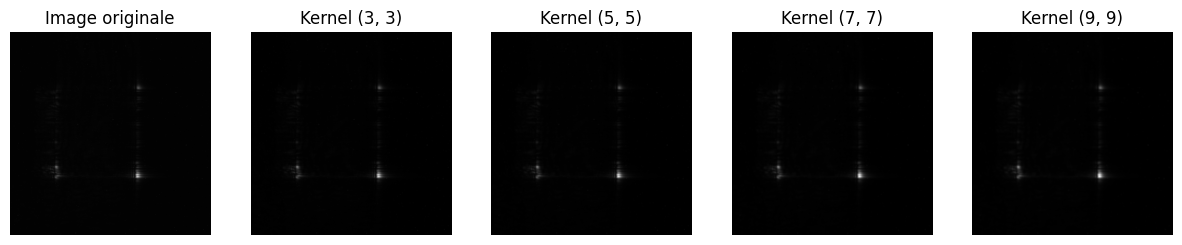

In [16]:
import cv2
import matplotlib.pyplot as plt

def filtrage_gaussien_et_affichage(image_path, kernel_sizes):
    # Charger l'image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    # Afficher l'image originale
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image originale')
    plt.axis('off')

    # Appliquer et afficher le filtrage gaussien pour chaque taille de noyau
    for i, kernel_size in enumerate(kernel_sizes):
        image_filtree = cv2.GaussianBlur(image, kernel_size, 0)
        plt.subplot(1, len(kernel_sizes) + 1, i + 2)
        plt.imshow(image_filtree, cmap='gray')
        plt.title(f'Kernel {kernel_size}')
        plt.axis('off')

    plt.show()

# Exemple d'utilisation de la fonction avec différentes tailles de noyaux
image_path = 'data/im3.tif'
kernel_sizes = [(3, 3), (5, 5), (7, 7), (9, 9)]
filtrage_gaussien_et_affichage(image_path, kernel_sizes)


En conclusion l'image filtrée n'est pas plus nette et n'est plus claire. 

#### Déconvolution : 

Déconvolution : La déconvolution est une technique qui vise à inverser le flou dans une image en estimant la fonction de transfert du système optique responsable du flou. Des méthodes telles que la déconvolution de Wiener ou la déconvolution aveugle peuvent être utilisées pour restaurer les détails perdus dans une image floue.

Déconvolution de Wiener : La déconvolution de Wiener est une méthode de déconvolution régularisée qui utilise la connaissance du bruit dans l'image pour restaurer l'image d'origine. Voici un exemple d'implémentation en utilisant la bibliothèque SciPy :

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_signaltools.py:1629: RuntimeWarning: divide by zero encountered in divide
  res *= (1 - noise / lVar)
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_signaltools.py:1629: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


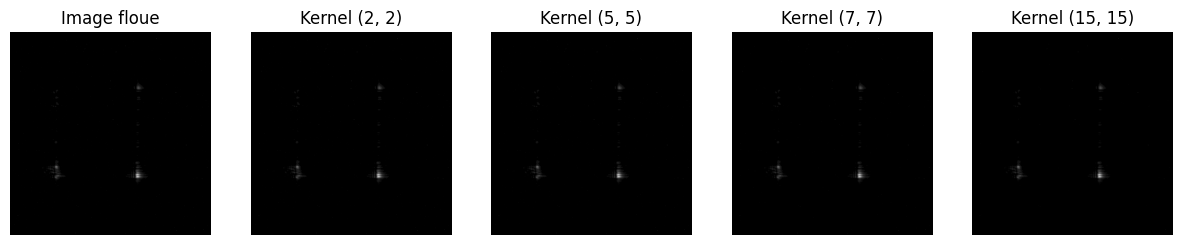

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import wiener

def deconvolution_wiener_et_affichage(image_floue, kernel_sizes):
    # Charger l'image
    image_floue = cv2.imread(image_floue, cv2.IMREAD_GRAYSCALE)
    
    # Afficher l'image originale
    plt.figure(figsize=(15, 5))
    plt.subplot(1, len(kernel_sizes) + 1, 1)
    plt.imshow(image_floue, cmap='gray')
    plt.title('Image floue')
    plt.axis('off')

    # Appliquer et afficher la déconvolution de Wiener pour chaque taille de noyau
    for i, kernel_size in enumerate(kernel_sizes):
        image_restauree = wiener(image_floue, kernel_size)
        plt.subplot(1, len(kernel_sizes) + 1, i + 2)
        plt.imshow(image_restauree, cmap='gray')
        plt.title(f'Kernel {kernel_size}')
        plt.axis('off')

    plt.show()

# Exemple d'utilisation de la fonction avec différentes tailles de noyaux
image_floue = 'data/im3.tif'
kernel_sizes = [(2, 2), (5, 5), (7, 7), (15, 15)]
deconvolution_wiener_et_affichage(image_floue, kernel_sizes)


Un noyau de taille (2, 2) est très petit, ce qui signifie qu'il ne capturera qu'une petite quantité d'information locale autour de chaque pixel. Dans de nombreux cas, un noyau aussi petit pourrait ne pas être pertinent pour la déconvolution, car il n'a pas suffisamment d'informations pour restaurer efficacement l'image floue.

### CNN : 

Besoin d'iam

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Générer des données synthétiques (images floues et nettes)
def generate_data(num_samples, image_size):
    X_flou = np.random.rand(num_samples, 1, image_size, image_size)
    kernel = np.ones((1, 1, 5, 5)) / 25  # Noyau de flou moyen
    X_net = np.array([np.squeeze(nn.functional.conv2d(torch.tensor(x).unsqueeze(0).float(), torch.tensor(kernel).float(), padding=2).numpy()) for x in X_flou])
    return torch.tensor(X_flou).float(), torch.tensor(X_net).float()

# Définir le modèle CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 1, kernel_size=3, padding=1)
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.conv3(x))
        return x

# Entraîner le modèle
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item() * inputs.size(0)
            val_loss /= len(val_loader.dataset)
            val_losses.append(val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses


Entrainement et test

c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32, 64, 64])) that is different to the input size (torch.Size([32, 1, 64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\mathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([8, 64, 64])) that is different to the input size (torch.Size([8, 1, 64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10], Train Loss: 0.0055, Val Loss: 0.0042
Epoch [2/10], Train Loss: 0.0036, Val Loss: 0.0032
Epoch [3/10], Train Loss: 0.0033, Val Loss: 0.0032
Epoch [4/10], Train Loss: 0.0033, Val Loss: 0.0032
Epoch [5/10], Train Loss: 0.0033, Val Loss: 0.0032
Epoch [6/10], Train Loss: 0.0033, Val Loss: 0.0032
Epoch [7/10], Train Loss: 0.0033, Val Loss: 0.0032
Epoch [8/10], Train Loss: 0.0033, Val Loss: 0.0032
Epoch [9/10], Train Loss: 0.0033, Val Loss: 0.0032
Epoch [10/10], Train Loss: 0.0033, Val Loss: 0.0032


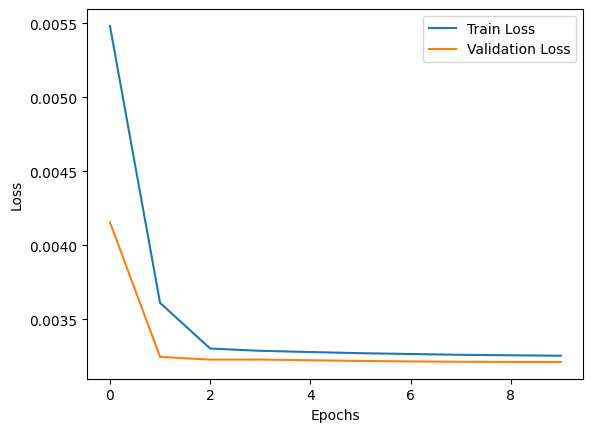

In [8]:

# Définir les paramètres d'entraînement
num_samples = 1000
image_size = 64
batch_size = 32
num_epochs = 10
learning_rate = 0.001

# Générer les données d'entraînement
X_flou, X_net = generate_data(num_samples, image_size)
train_dataset = TensorDataset(X_flou, X_net)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# Créer le modèle et les fonctions de perte et d'optimisation
model = CNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Entraîner le modèle
train_losses, val_losses = train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs)

# Afficher les courbes de perte
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test sur une image TIF floue 

In [9]:

def preprocess_image(image):
    # Convertir l'image en format torch.Tensor et normaliser les valeurs de pixel
    image_tensor = torch.tensor(image.astype(np.float32)).unsqueeze(0).unsqueeze(0)  # Ajouter des dimensions pour correspondre aux attentes du modèle
    image_tensor /= 65535.0  # Normaliser les valeurs de pixel pour qu'elles soient comprises entre 0 et 1
    return image_tensor

def restore_image(model, image_floue_path):
    # Charger l'image floue en tant qu'array numpy
    image_floue = tiff.imread(image_floue_path)
    
    # Prétraiter l'image floue
    image_tensor = preprocess_image(image_floue)
    
    # Mettre le modèle en mode d'évaluation
    model.eval()
    
    # Appliquer le modèle à l'image prétraitée pour obtenir une version restaurée
    with torch.no_grad():
        image_restaurée = model(image_tensor)
    
    # Convertir le tensor en tableau numpy et enlever les dimensions supplémentaires
    image_restaurée = image_restaurée.squeeze().cpu().numpy()
    
    return image_restaurée

In [10]:
# Exemple d'utilisation de la fonction de test
image_floue_path = 'data/im3.tif'  # Chemin de votre image floue TIFF
image_restaurée = restore_image(model, image_floue_path)

C:\Users\mathi\AppData\Local\Temp\ipykernel_11052\2769700180.py:12: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(save_path, image)


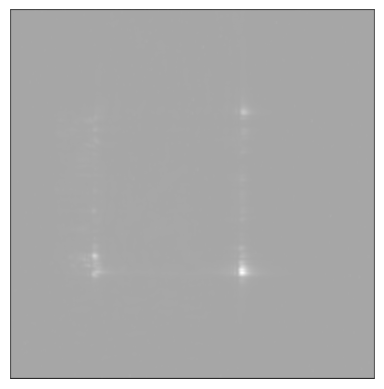

In [11]:
def display_image(image):
    # Normaliser les valeurs de pixel pour qu'elles soient comprises entre 0 et 1
    image = (image - image.min()) / (image.max() - image.min())

    # Afficher l'image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

def save_image(image, save_path):
    # Enregistrer l'image dans le format TIFF
    tiff.imsave(save_path, image)

# Chemin où vous souhaitez sauvegarder l'image restaurée
save_path = 'data/display_upgraded.tif'
save_image(image_restaurée, save_path)

# Exemple d'utilisation de la fonction pour afficher l'image restaurée
display_image(image_restaurée)

### Ajouter du flou pour les images afin qu'elles soit exploitables 

In [15]:
def extract_brillouin_pattern(image_restaurée):
    # Convertir l'image restaurée en niveaux de gris
    gray_image = cv2.cvtColor(image_restaurée, cv2.COLOR_BGR2GRAY)
    
    # Appliquer un seuillage adaptatif pour binariser l'image
    binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Trouver les contours dans l'image binarisée
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Dessiner les contours sur une copie de l'image originale
    pattern_image = image_restaurée.copy()
    cv2.drawContours(pattern_image, contours, -1, (0, 255, 0), 2)
    
    return pattern_image

# Exemple d'utilisation de la fonction pour extraire le motif de brillouin de l'image restaurée
image_with_brillouin_pattern = extract_brillouin_pattern(image_restaurée)

error: OpenCV(4.8.1) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xd8611878::Set<1,-1,-1>,struct cv::impl::A0xd8611878::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
